In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing and Formatting Citation Data

In [ ]:
#Import citation data 

citation= pd.read_csv("/content/drive/MyDrive/MATH 167PS: Project: Robert, Priya, Van/2018_Parking_Citations.csv")

#remove any rows with NAs and reset index
citation.dropna(inplace=True)
citation.reset_index(inplace=True)
del citation['index']

#reformate string formatting of coordinated to numerical (x,y) tuples
pt=[]
for i in range(len(citation['geom'])):
  x=str(citation['geom'][i])
  p=x.strip('POINT ()').split(' ')
  pt.append(tuple([float(p[0]),float(p[1])]))

#replace with new updated coordinates
del citation['geom']
citation['coord']=pt

#remove Any Nonsensical Violations (Where Fine Amount==0 or 'NO VIOL)
citation=citation[(citation['Fine Amount']>0) & (citation['Violation Description']!='NO VIOL')]

#Check for any duplicates across rows:
citation[citation.duplicated()]

display(citation)

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,coord
0,PD30304794,01/01/2018 12:24:00 AM,V22500E,DRIVEWAY,99 FARALLONES ST,CA,7ZLS533,110,04/26/2021 12:00:00 AM,"(-122.45591601499996, 37.713888990000044)"
1,PD31110472,01/01/2018 12:39:00 AM,V22500H,DBL PARK,100 BLK OFARRELL ST,CA,7GSR366,110,04/30/2020 12:00:00 AM,"(-122.40647036599995, 37.78669290600004)"
2,PD31209065,01/01/2018 01:35:00 AM,V22500B,PK/CROSS,LEAVENWORTH,CA,1BT3306,110,04/01/2018 12:00:00 AM,"(-122.41589645799996, 37.792043138000054)"
3,PD27137331,01/01/2018 02:45:00 AM,V22500I,BUS ZONE,45 3RD ST,CA,7YLF203,288,02/05/2018 12:00:00 AM,"(-122.40273773799998, 37.786938931000066)"
4,PD31608010,01/01/2018 03:20:00 AM,V22500F,ON SIDEWLK,THORTON APOLLO,CA,7UTH588,110,10/02/2020 12:00:00 AM,"(-122.398509908, 37.73169412200008)"
...,...,...,...,...,...,...,...,...,...,...
1021823,904601235,12/30/2018 10:50:00 PM,V22500H,DBL PARK,179 TUCKER AVE,CA,6ROF517,110,04/30/2020 12:00:00 AM,"(-122.40765100499999, 37.716252016000055)"
1021824,901631426,12/30/2018 10:50:00 PM,V22500H,DBL PARK,182 TUCKER AVE,CA,4NMN709,110,02/14/2021 12:00:00 AM,"(-122.40755897099996, 37.716614994000054)"
1021825,904938484,12/30/2018 10:57:00 PM,TRC7.2.25,RED ZONE,1499 17TH AVE,CA,8M92319,110,04/30/2020 12:00:00 AM,"(-122.47478036099994, 37.75998403800003)"
1021826,PD33606311,12/30/2018 11:20:00 PM,TRC7.2.25,RED ZONE,RICHLAND AND LEESE,CA,7SWR148,110,02/13/2019 12:00:00 AM,"(-122.42315995599995, 37.73594005900003)"


In [ ]:
#Summary Statistics On Citation Data

#How many citations:
print(len(citation)) #1020944

#Total Citation revenue:
print(sum(citation['Fine Amount'])) #91795968

#Avg revenue per citation:
print(sum(citation['Fine Amount'])/len(citation)) #$89.91

#How many of each State license plates (out state vs in state)
print(len(citation[citation['Vehicle Plate State']=='CA'])/len(citation)) #95.7% in state

#How many types of violation:
print(len(set(citation['Violation Description']))) #119 type of violations


1020944
91795968
89.91283361281324
0.9570005798555062
119


Importing Tract Coordinate Data

In [ ]:
tract= pd.read_excel("/content/drive/MyDrive/MATH 167PS: Project: Robert, Priya, Van/SF_tracts.xlsx")

#Grab the relevant columns renamed (coordinates,Tract Code)
tract=tract[['the_geom','NAME10']]
tract.rename(columns={'the_geom':'coord','NAME10':'tract'},inplace=True)

#Format Multipolygon coordinates from string to numerical lists for each tract
new=[]
for i in range(len(tract)):
    t=tract['coord'][i].strip('MULTIPOLYGON (())').split(',')
    x=[t[a].split() for a in range(len(t))]
    new.append(x)

#Delete old unformatted coordinates with new 
del tract['coord']
tract['coord']=new
display(tract)

#How many Total Tracts in SF:
print(len(tract)) #197

,tract,coord
0,165.00,"[[-122.446471, 37.775802], [-122.4447799999999..."
1,164.00,"[[-122.44033999999999, 37.776579999999996], [-..."
2,163.00,"[[-122.429152, 37.778006999999995], [-122.4289..."
3,161.00,"[[-122.428909, 37.778039], [-122.429152, 37.77..."
4,160.00,"[[-122.420425, 37.780583], [-122.4203359999999..."
...,...,...
192,176.01,"[[-122.40715900000001, 37.779739], [-122.40769..."
193,170.00,"[[-122.44257499999999, 37.765927999999995], [-..."
194,169.00,"[[-122.42694799999998, 37.769175], [-122.42746..."
195,167.00,"[[-122.439301, 37.768166], [-122.440137, 37.76..."


197


Importing Tract Demographics Data

In [ ]:
#Import Tract demographics data

income_pop= pd.read_excel("/content/drive/MyDrive/MATH 167PS: Project: Robert, Priya, Van/Income_population_tract.xlsx")

#Delete the first unformatted row
income_pop.drop(0,inplace=True)

display(income_pop)
#Remove tracts/rows with unknown information
list(income_pop[income_pop['Tract Income Level']=='Unknown']['Tract Code']) 
income_pop=income_pop[income_pop['Tract Income Level']!='Unknown']

#Pull only the relevant columns:
t=income_pop[['Tract Code','Tract Income Level','2018 Est. Tract Median Family Income','Tract Population',
              'Tract Minority %','Owner Occupied Units','1- to 4- Family Units']]
display(t)

,Tract Code,Tract Income Level,Distressed or Under,Tract Median Family Income %,2018 FFIEC Est. MSA/MD non-MSA/MD Median Family Income,2018 Est. Tract Median Family Income,2015 Tract Median Family Income,Tract Population,Tract Minority %,Minority Population,Owner Occupied Units,1- to 4- Family Units
1,101.00,Moderate,No,78.78,116400.0,91700.0,81729.0,3798.0,52.95,2011.0,346.0,357.0
2,102.00,Upper,No,143.49,116400.0,167022.0,148864.0,4172.0,16.61,693.0,826.0,823.0
3,103.00,Middle,No,89.25,116400.0,103887.0,92593.0,4387.0,47.14,2068.0,507.0,1272.0
4,104.00,Middle,No,101.87,116400.0,118577.0,105684.0,5148.0,41.82,2153.0,795.0,1430.0
5,105.00,Upper,No,163.26,116400.0,190035.0,169375.0,2589.0,49.52,1282.0,371.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...
193,9804.01,Unknown,No,0.00,116400.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
194,9805.01,Low,No,22.80,116400.0,26539.0,23654.0,880.0,92.95,818.0,83.0,109.0
195,9806.00,Unknown,No,0.00,116400.0,0.0,0.0,487.0,88.91,433.0,103.0,142.0
196,9809.00,Upper,No,121.29,116400.0,141182.0,125833.0,271.0,56.83,154.0,17.0,48.0


,Tract Code,Tract Income Level,2018 Est. Tract Median Family Income,Tract Population,Tract Minority %,Owner Occupied Units,1- to 4- Family Units
1,101.00,Moderate,91700.0,3798.0,52.95,346.0,357.0
2,102.00,Upper,167022.0,4172.0,16.61,826.0,823.0
3,103.00,Middle,103887.0,4387.0,47.14,507.0,1272.0
4,104.00,Middle,118577.0,5148.0,41.82,795.0,1430.0
5,105.00,Upper,190035.0,2589.0,49.52,371.0,130.0
...,...,...,...,...,...,...,...
189,614.00,Middle,138784.0,6140.0,52.30,1154.0,1923.0
190,615.00,Upper,192316.0,12511.0,50.50,2729.0,251.0
191,9802.00,Upper,150412.0,330.0,37.27,25.0,75.0
194,9805.01,Low,26539.0,880.0,92.95,83.0,109.0


Summary Statistics on Tract Population Demographics:

127486.0
823772.0


,Tract Code,2018 Est. Tract Median Family Income,Tract Population,Tract Minority %,Owner Occupied Units,1- to 4- Family Units
Tract Income Level,,,,,,
Low,517.776667,37893.600000,3683.966667,77.326000,223.600000,463.566667
Middle,300.189455,113480.527273,4847.800000,57.285273,784.781818,1392.327273
Moderate,270.883590,77571.025641,4786.717949,75.717436,672.205128,1080.743590
Upper,523.035938,181367.328125,4061.593750,36.992031,803.109375,1113.484375


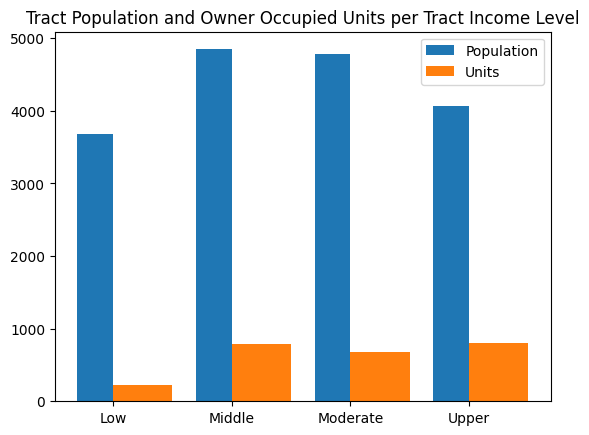

In [ ]:
#Which tract had Unknown information: 9 Tracts:
#[124.02, 162.0, 168.02, 178.01, 332.01, 9803.0, 9804.01, 9806.0, 9901.0]

#How many total occupied units and population
print(sum(t['Owner Occupied Units'])) #127,486
print(sum(t['Tract Population'])) #823,772

#Average Income, # Occupied Units, and Population count for each tract
t_avg=t.groupby('Tract Income Level').mean()
display(t_avg)

x=list(t_avg.index)
ya=list(t_avg['Tract Population'])
yc=list(t_avg['Owner Occupied Units'])


plt.bar(x,ya,width=-0.3,align='edge',label='Population')
plt.bar(x,yc,width=0.5,align='edge',label='Units')
plt.title("Tract Population and Owner Occupied Units per Tract Income Level")
plt.legend();

Assigning tract to each citation according to the geolocation data. Due to the size of the data, google colab had some errors with running the code, therefore we split the data into two. Saves the citation data along with the assigned tract in a csv. WARNING: This code takes 4+ hours to run, since we check each coordinate against all tracts. This is a modified version of this code: https://www.tutorialspoint.com/what-s-the-fastest-way-of-checking-if-a-point-is-inside-a-polygon-in-python

In [ ]:
import matplotlib.path as mplPath
head=citation['coord'][:500000] #Splitting the citation data into two for storage purposes
tail=citation["coord"][500000:]
check=[] #list to be added to the citation DataFrame
for p in head:
   foundTract=False
   for i in range(len(tract['coord'])):
     poly_path=mplPath.Path(tract['coord'][i]) # If the tract contains the coordinate of the citation, a tract is found
     c=(p,poly_path.contains_point(p)) 
     if c[1]==True:
       check.append(tract['tract'][i]) #append a tract if a tract is found
       foundTract=True
     elif (c[1]==False) & (i==len(tract['coord'])-1) & (foundTract==False): # If haven't found the tract by time the index hits the end of the file, append no tract.
       check.append(-1)
check2=[]
for p in tail:
   foundTract=False
   for i in range(len(tract['coord'])):
     poly_path=mplPath.Path(tract['coord'][i]) # If the tract contains the coordinate of the citation, a tract is found
     c=(p,poly_path.contains_point(p))
     if c[1]==True:
       check2.append(tract['tract'][i]) #append a tract if a tract is found
       foundTract=True
     elif (c[1]==False) & (i==len(tract['coord'])-1) & (foundTract==False): # If haven't found the tract by time the index hits the end of the file, append no tract.
       check2.append(-1)
for x in check2:
  check.append(x)
check
citation["tract"]=check #saving the list of tracts to the DataFrame
citation.to_csv('citation_with_tract.csv') #Saving the Dataframe to a csv to save runtime

Loading the updated Citation with Tract Code

In [ ]:
#Import the updated citation file with corresponding Tract Codes. 
citation_tract = pd.read_csv("/content/drive/MyDrive/MATH 167PS: Project: Robert, Priya, Van/citation_with_tract.csv",index_col=0)

#Merge the demographic data and citation data on Tract Code and drop old columns
income_merge = pd.merge(income_pop,citation_tract,left_on='Tract Code', right_on='tract')
income_merge = income_merge.drop(['tract','coord'], axis=1)

#Keep only the relevant columns
income_merge=income_merge[['Tract Code','Tract Income Level','2018 Est. Tract Median Family Income','Tract Population','Tract Minority %',
                           'Owner Occupied Units','Violation Description','Fine Amount','1- to 4- Family Units']]
income_merge = income_merge[(income_merge['Violation Description']!='NO VIOL') & (income_merge['Fine Amount']>0)]
display(income_merge)

,Tract Code,Tract Income Level,2018 Est. Tract Median Family Income,Tract Population,Tract Minority %,Owner Occupied Units,Violation Description,Fine Amount,1- to 4- Family Units
0,101.0,Moderate,91700.0,3798.0,52.95,346.0,STR CLEAN,73,357.0
1,101.0,Moderate,91700.0,3798.0,52.95,346.0,STR CLEAN,73,357.0
2,101.0,Moderate,91700.0,3798.0,52.95,346.0,REG TABS,121,357.0
3,101.0,Moderate,91700.0,3798.0,52.95,346.0,STR CLEAN,73,357.0
4,101.0,Moderate,91700.0,3798.0,52.95,346.0,STR CLEAN,73,357.0
...,...,...,...,...,...,...,...,...,...
959051,9809.0,Upper,141182.0,271.0,56.83,17.0,OT OUT DT,76,48.0
959052,9809.0,Upper,141182.0,271.0,56.83,17.0,REG TABS,121,48.0
959053,9809.0,Upper,141182.0,271.0,56.83,17.0,REG TABS,242,48.0
959054,9809.0,Upper,141182.0,271.0,56.83,17.0,REG TABS,121,48.0


Data Wrangling to obtain Tract Averages

In [ ]:
#Table of Tract averages

#Get income, population, and Units occupied averages by Tract 
tract_avg=income_merge.groupby(['Tract Code','Tract Income Level']).mean().reset_index()

#Get # of Citation counts by Tract
tract_counts=income_merge[['Tract Code','Fine Amount']].groupby('Tract Code').count().rename(columns={'Fine Amount':'Citation Counts'})

#Merge Counts and Averages for each tract
t_avg=pd.merge(tract_avg,tract_counts,on='Tract Code').rename(columns={
    '2018 Est. Tract Median Family Income':'AVG Median Income','Fine Amount':'AVG Fine Amount','Tract Population':'AVG Population',
    'Owner Occupied Units':'AVG Owner Units Occupied','Tract Minority %':'AVG Tract Minority %','Tract Income Level':'Class',
    '1- to 4- Family Units':'Avg Family Units'})

#Get Average revenue/capita:
t_avg['Revenue per Capita']=(t_avg['AVG Fine Amount']*t_avg['Citation Counts'])/t_avg['AVG Population']
display(t_avg)

#What is the average revenue per capita of the entire datatset? 
print(t_avg['Revenue per Capita'].mean()) #$120.80

#Check: Total # citations==959056?
print(t_avg['Citation Counts'].sum())

<ipython-input-8-ce6ac01e7827>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tract_avg=income_merge.groupby(['Tract Code','Tract Income Level']).mean().reset_index()


,Tract Code,Class,AVG Median Income,AVG Population,AVG Tract Minority %,AVG Owner Units Occupied,AVG Fine Amount,Avg Family Units,Citation Counts,Revenue per Capita
0,101.00,Moderate,91700.0,3798.0,52.95,346.0,88.339376,357.0,17488,406.761190
1,102.00,Upper,167022.0,4172.0,16.61,826.0,87.231281,823.0,8574,179.271572
2,103.00,Middle,103887.0,4387.0,47.14,507.0,88.409938,1272.0,2576,51.913380
3,104.00,Middle,118577.0,5148.0,41.82,795.0,87.584086,1430.0,4210,71.625680
4,105.00,Upper,190035.0,2589.0,49.52,371.0,98.729609,130.0,32379,1234.749324
...,...,...,...,...,...,...,...,...,...,...
183,614.00,Middle,138784.0,6140.0,52.30,1154.0,81.668402,1923.0,4418,58.764007
184,615.00,Upper,192316.0,12511.0,50.50,2729.0,98.232947,251.0,50183,394.023180
185,9802.00,Upper,150412.0,330.0,37.27,25.0,76.422932,75.0,532,123.203030
186,9805.01,Low,26539.0,880.0,92.95,83.0,86.445977,109.0,435,42.731818


120.7990885333136
958299


Creating boxplots of Aggregated Tract Averages

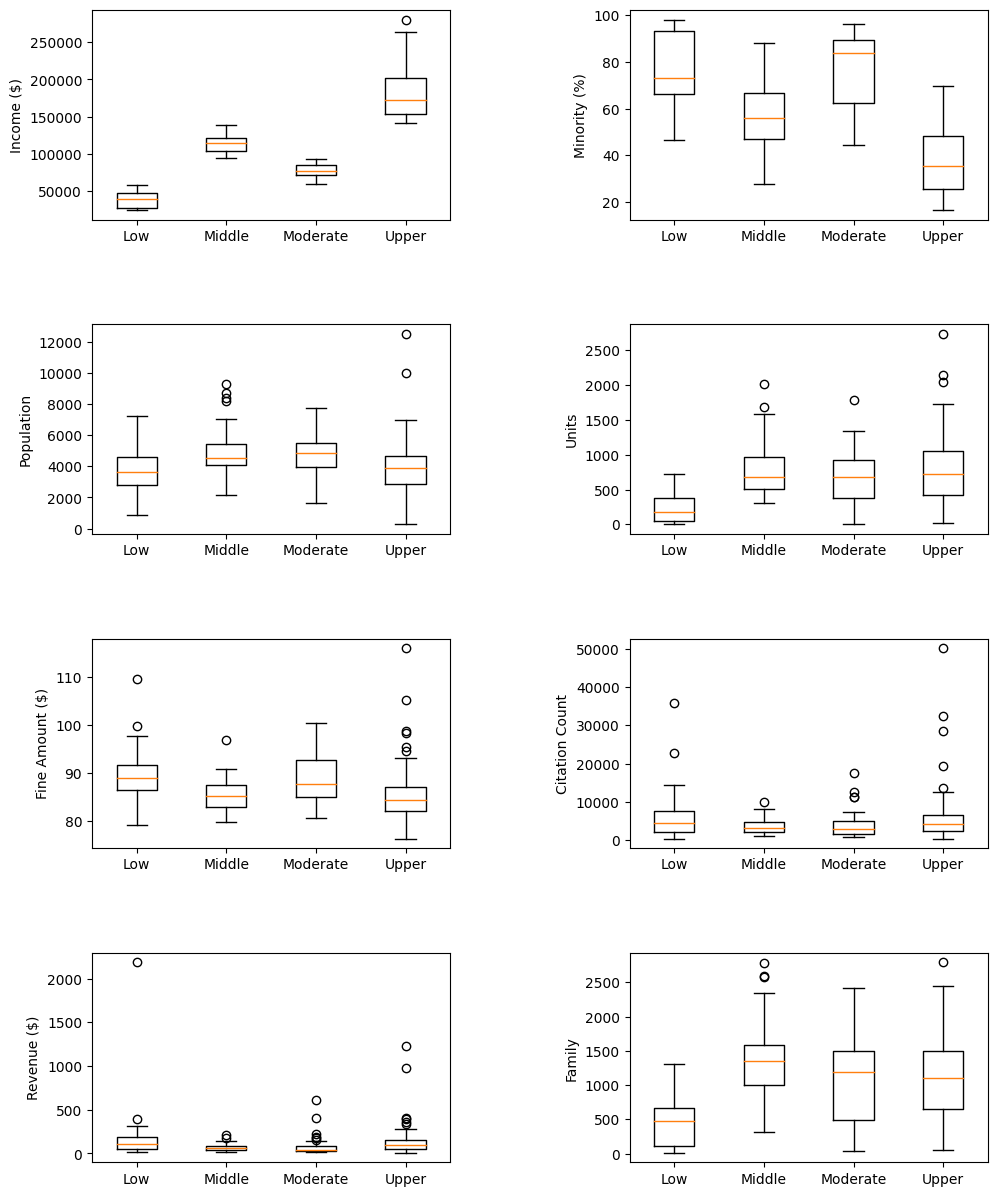

In [ ]:
#Create Boxplot of aggregated columns across the Classes:
levels=sorted(set(t_avg['Class']))
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
income=[]
minority=[]
population=[]
units=[]
amount=[]
count=[]
revenue=[]
family=[]

for i in levels:
  c=t_avg[t_avg['Class']==i]
  income.append(list(c['AVG Median Income']))
  minority.append(list(c['AVG Tract Minority %']))
  population.append(list(c['AVG Population']))
  units.append(list(c['AVG Owner Units Occupied']))
  amount.append(list(c['AVG Fine Amount']))
  count.append(list(c['Citation Counts']))
  revenue.append(list(c['Revenue per Capita']))
  family.append(list(c['Avg Family Units']))

fig, (axs) = plt.subplots(4, 2, sharey=False)
axs[0,0].boxplot(income,labels=levels)
axs[0,0].set_ylabel("Income ($)")
axs[0,1].boxplot(minority,labels=levels)
axs[0,1].set_ylabel("Minority (%)")
axs[1,0].boxplot(population,labels=levels)
axs[1,0].set_ylabel("Population")
axs[1,1].boxplot(units,labels=levels)
axs[1,1].set_ylabel("Units")
axs[2,0].boxplot(amount,labels=levels)
axs[2,0].set_ylabel("Fine Amount ($)")
axs[2,1].boxplot(count,labels=levels)
axs[2,1].set_ylabel("Citation Count")
axs[3,0].boxplot(revenue,labels=levels);
axs[3,0].set_ylabel("Revenue ($)")
axs[3,1].boxplot(family,labels=levels);
axs[3,1].set_ylabel("Family")
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=2.5, 
                    wspace=.5, 
                    hspace=.5)
plt.show();




Keeping Revenue on the Y Axis, Explore Association with other variables

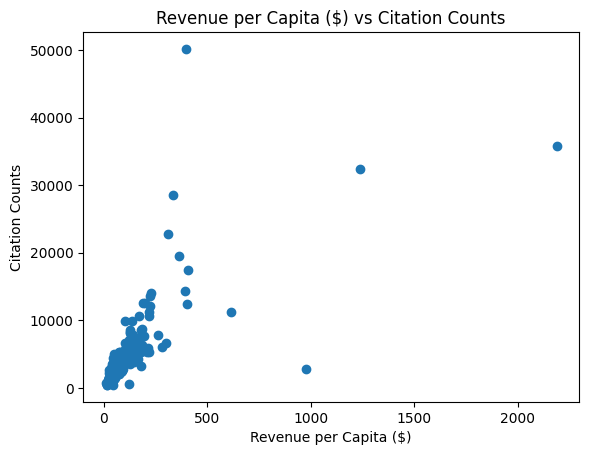

In [ ]:
#Relationship of Citation counts and Revenue (Should be linear positive)

plt.scatter(t_avg['Revenue per Capita'],t_avg['Citation Counts']) 
plt.xlabel('Revenue per Capita ($)')
plt.ylabel('Citation Counts')
plt.title("Revenue per Capita ($) vs Citation Counts");
#So Revenue is a good enough reflection of Citation counts. No need to further look at relationships with counts. 

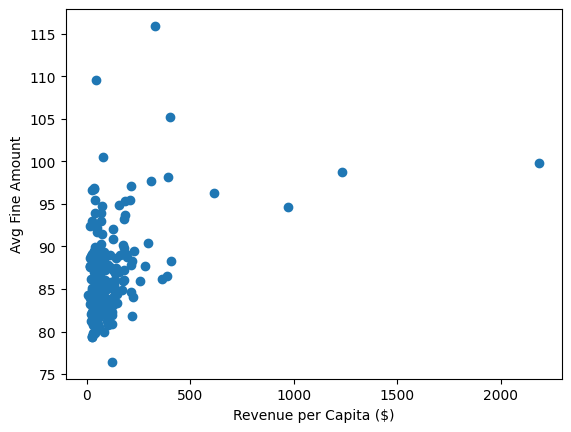

In [ ]:
#Relationship of Avg Fine amount and Revenue (Should be a linear positive)

plt.scatter(t_avg['Revenue per Capita'],t_avg['AVG Fine Amount']) 
plt.xlabel('Revenue per Capita ($)')
plt.ylabel('Avg Fine Amount');

120.7990885333136
[8.74540325e-05]
110.55998157194487


<ipython-input-12-71636fe28a82>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=t_avg['AVG Median Income'][:, np.newaxis]


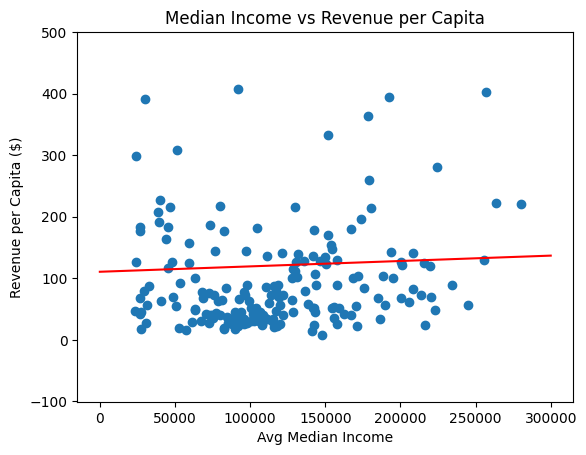

In [ ]:
#Average Citation Revenue per capita of entire dataset:
print(t_avg['Revenue per Capita'].mean()) #$120.80

#Avg Income vs Revenue per capita scatter plot.
fig, ax = plt.subplots()
ax.scatter(t_avg['AVG Median Income'],t_avg['Revenue per Capita'])
model = LinearRegression(fit_intercept=True)
X=t_avg['AVG Median Income'][:, np.newaxis]
model.fit(X,t_avg['Revenue per Capita'])
xx = np.linspace(0,300000,300000).reshape(300000,1)
y_hat = model.predict(xx)
ax.plot(xx,y_hat, color = 'r');
ax.set_title("Median Income vs Revenue per Capita")
ax.set_ylabel("Revenue per Capita ($)");
ax.set_xlabel('Avg Median Income')
ax.set_ylim(ymax=500);

print(model.coef_) #Slope --> 8.74183273e-05 --> Very negligble
print(model.intercept_)
#Setting y axis range lower to see a better picture of the relationship without those high outliers


<ipython-input-13-bfd1f2b41271>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=t_avg['AVG Tract Minority %'][:, np.newaxis]


[-0.90014013]
172.46588686047087


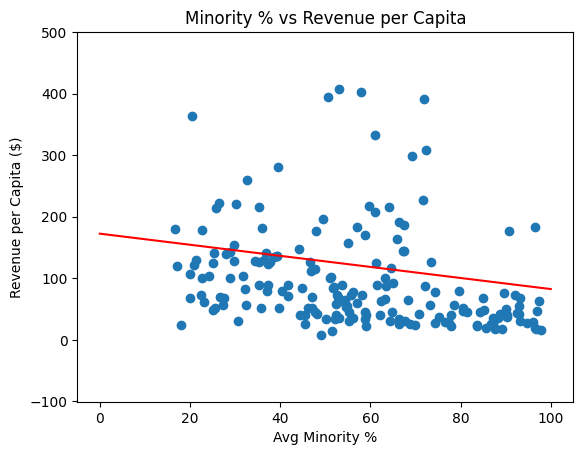

In [ ]:
#Minority% vs Revenue per capita.
fig, ax = plt.subplots()
ax.scatter(t_avg['AVG Tract Minority %'],t_avg['Revenue per Capita'])

model = LinearRegression(fit_intercept=True)
X=t_avg['AVG Tract Minority %'][:, np.newaxis]
model.fit(X,t_avg['Revenue per Capita'])
xx = np.linspace(0,100,100).reshape(100,1)
y_hat = model.predict(xx)
ax.plot(xx,y_hat, color = 'r');
ax.set_title("Minority % vs Revenue per Capita")
ax.set_ylabel("Revenue per Capita ($)");
ax.set_xlabel('Avg Minority %')
ax.set_ylim(ymax=500);

print(model.coef_) #Slope --> -0.90008614 --> A little bit more noticeable
print(model.intercept_)

<ipython-input-14-04288c39abdf>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=t_avg['AVG Population'][:, np.newaxis]


[-0.02562589]
233.08573068290386


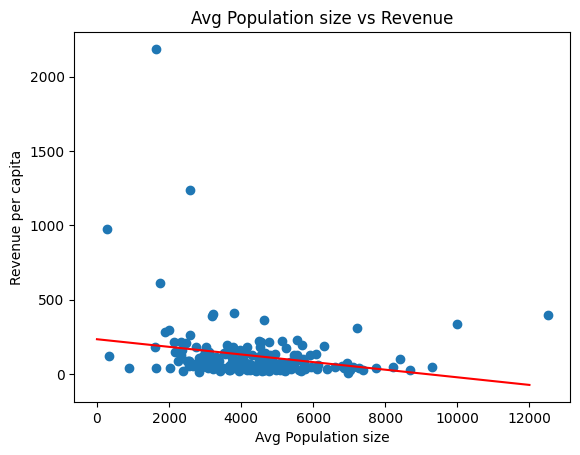

In [ ]:
#Revenue vs Population size
fig, ax = plt.subplots()
ax.scatter(t_avg['AVG Population'],t_avg['Revenue per Capita'])

model = LinearRegression(fit_intercept=True)
X=t_avg['AVG Population'][:, np.newaxis]
model.fit(X,t_avg['Revenue per Capita'])
xx = np.linspace(0,12000,12000).reshape(12000,1)
y_hat = model.predict(xx)
ax.plot(xx,y_hat, color = 'r');
ax.set_title("Avg Population size vs Revenue")
ax.set_ylabel("Revenue per capita");
ax.set_xlabel('Avg Population size')  ;       

              
print(model.coef_) #-0.026 : negligible relationship here but a little negative
print(model.intercept_)

Additional Relationships Explored:

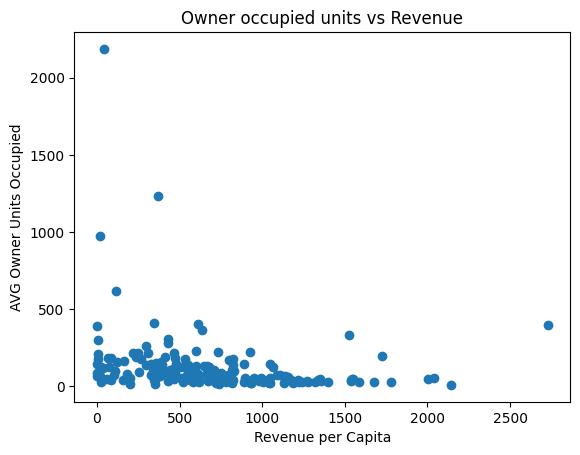

In [ ]:
#Owner occupied units vs Revenue
fig, ax = plt.subplots()
ax.scatter(t_avg['AVG Owner Units Occupied'],t_avg['Revenue per Capita']);
ax.set_title("Owner occupied units vs Revenue")
ax.set_ylabel("AVG Owner Units Occupied");
ax.set_xlabel('Revenue per Capita')  ; 

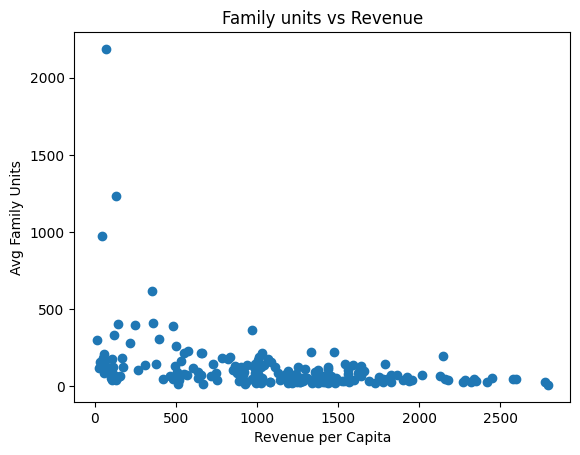

In [ ]:
#Family units vs Revenue
fig, ax = plt.subplots()
ax.scatter(t_avg['Avg Family Units'],t_avg['Revenue per Capita']);
ax.set_title("Family units vs Revenue")
ax.set_ylabel("Avg Family Units");
ax.set_xlabel('Revenue per Capita')  ; 

Creating a scatter and regression line of Citation Count and Revenue across Minority % and Population Size

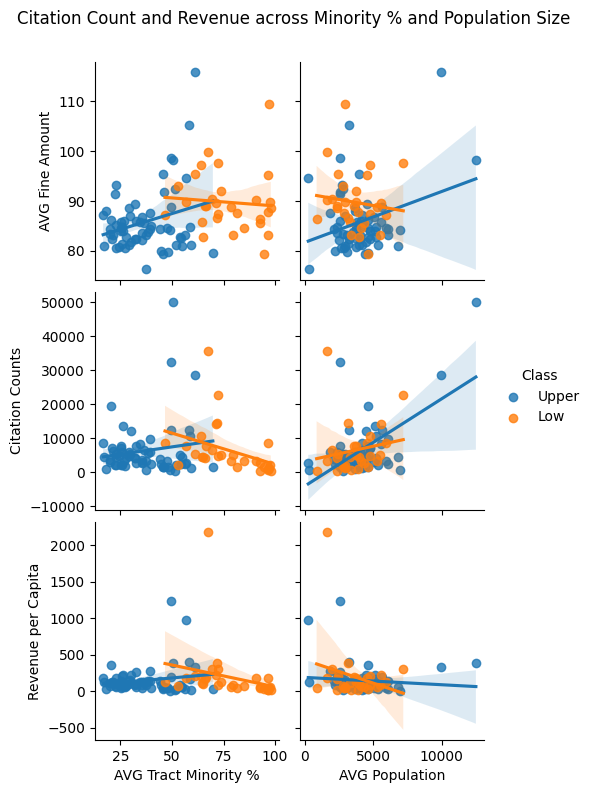

In [ ]:
lower_upper= t_avg[(t_avg['Class'] == 'Low') | (t_avg['Class'] == 'Upper')] #compare between low and upper income
pp = sns.pairplot(data=lower_upper,
                  x_vars=['AVG Tract Minority %', 'AVG Population'],
                  y_vars=['AVG Fine Amount','Citation Counts','Revenue per Capita'],hue='Class',kind='reg')

pp.fig.suptitle("Citation Count and Revenue across Minority % and Population Size", y=1.05);

#Although we have pointed out that counts and revenue have a linear relationship, we see how 
#the relationships are opposite in the Lower class when associated with Population. 

Associations to Revenue Per Capita BY CLASS:

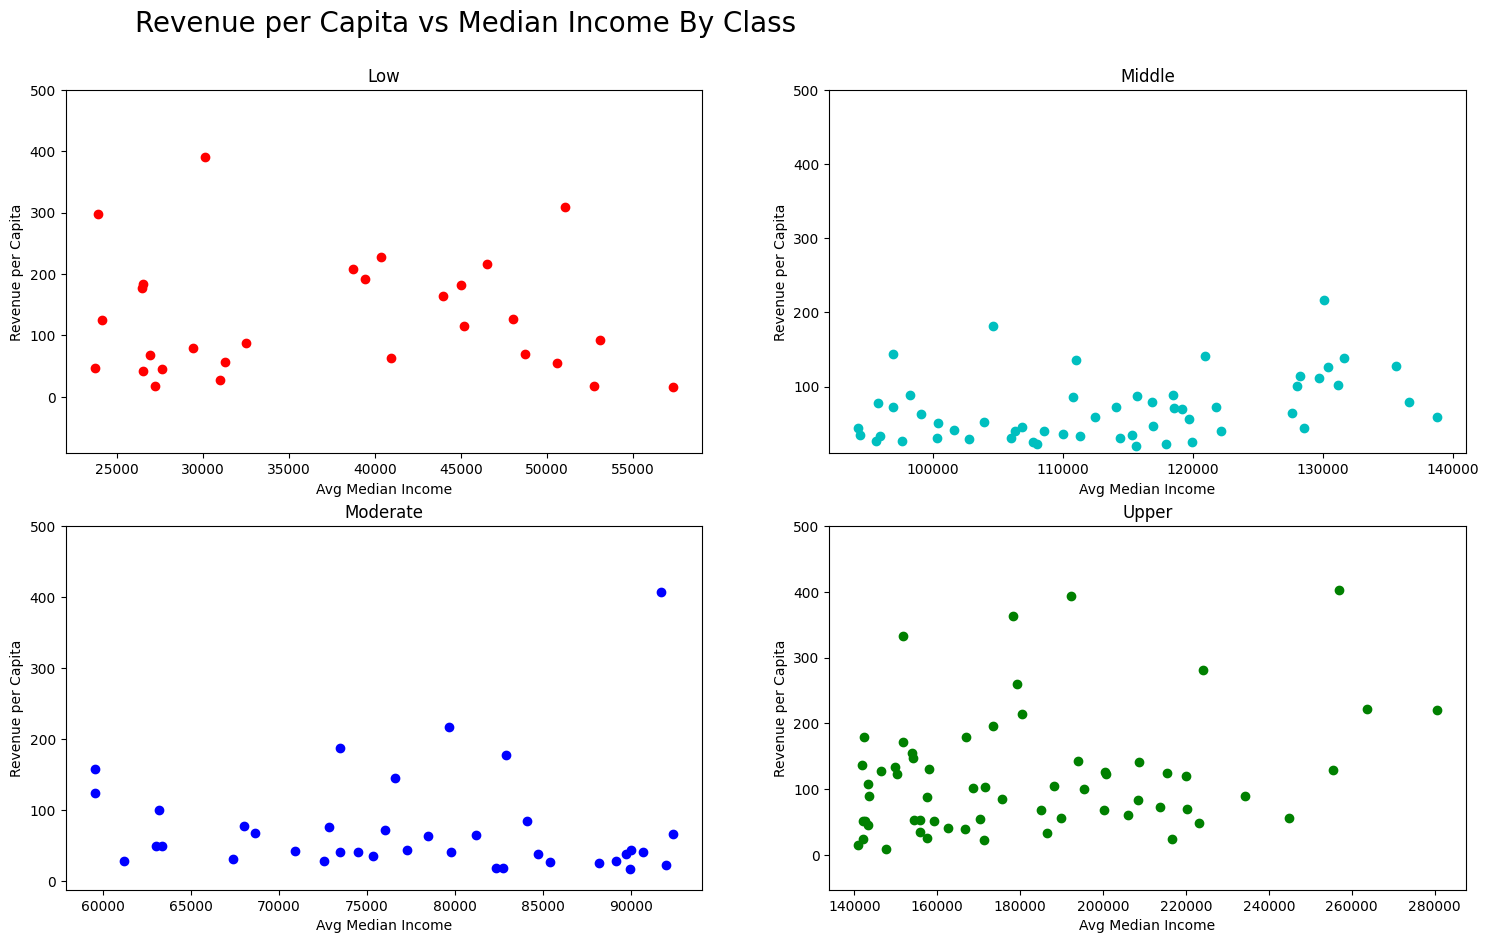

In [ ]:
#Avg Income vs Revenue per capita. Using each Tract as a datapoint:
levels=sorted(list(set(t_avg['Class'])))
colors=['r','c','b','g']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, ax in zip(range(len(levels)), axs.ravel()):
  l=t_avg[t_avg['Class']==levels[i]]
  ax.scatter(l['AVG Median Income'],l['Revenue per Capita'],c=colors[i])
  ax.set_xlabel('Avg Median Income')
  ax.set_ylabel('Revenue per Capita')
  ax.set_title(levels[i])
  ax.set_ylim(ymax=500)
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=.9, 
                    wspace=0.2, 
                    hspace=0.2)
fig.suptitle("Revenue per Capita vs Median Income By Class",fontsize=20)
plt.show()

#These Graphs don't show a particular LINEAR relationship of Median income vs Revenue. 
#BUT they do show that within each class, revenue isnt impacted by changing income. 
#AND it also shows that Lower class and Upper class share no noticeable differences which is interesting. 

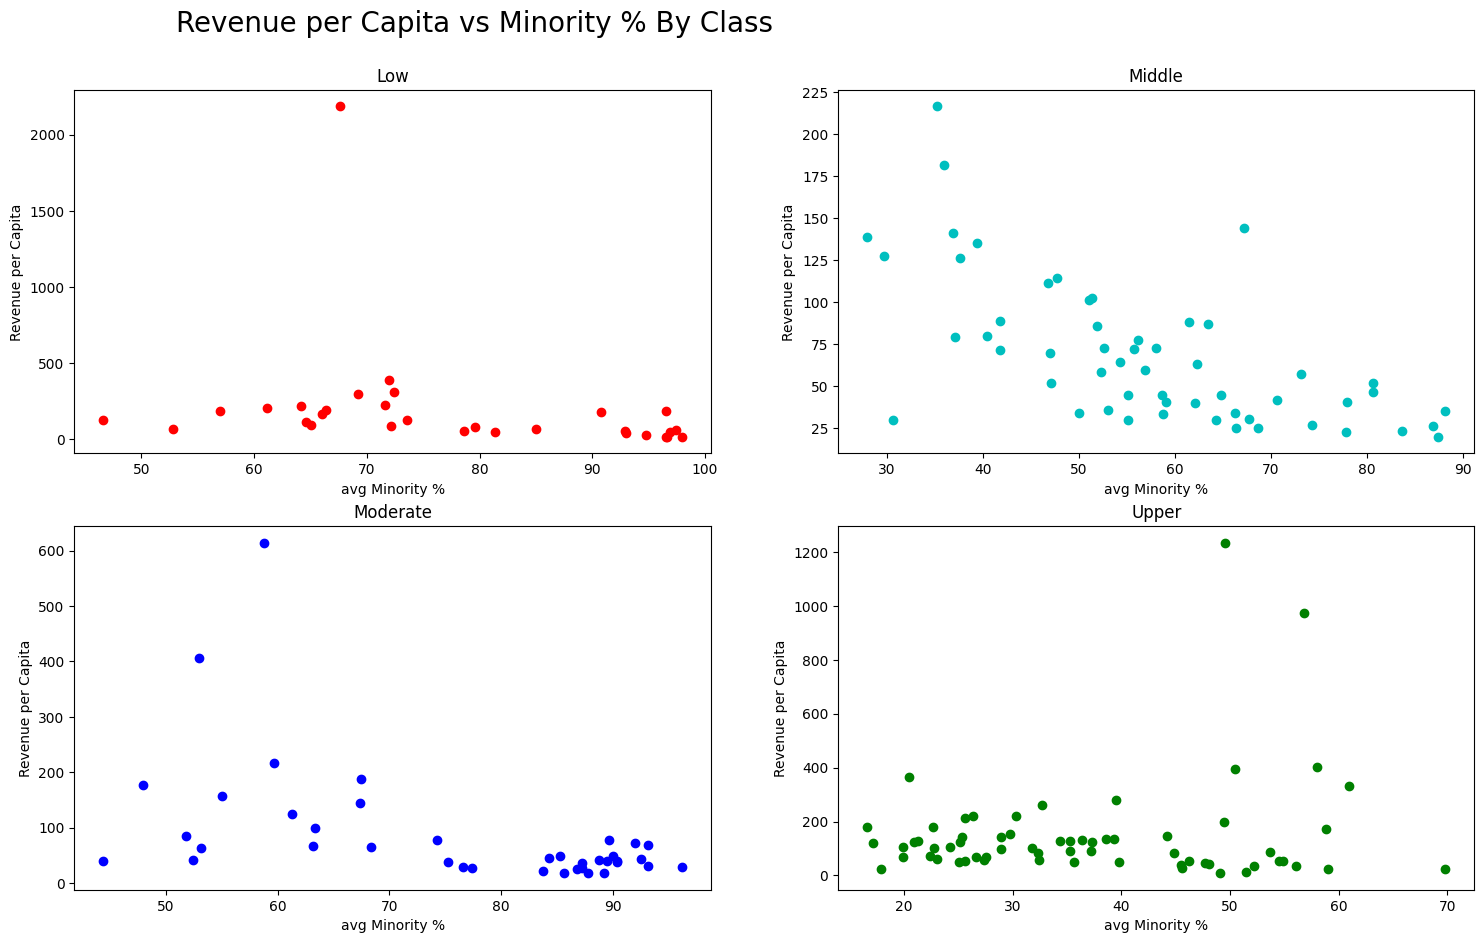

In [ ]:
#Avg population vs Revenue per capita. Using each Tract as a datapoint:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, ax in zip(range(len(levels)), axs.ravel()):
  l=t_avg[t_avg['Class']==levels[i]]
  ax.scatter(l['AVG Tract Minority %'],l['Revenue per Capita'],c=colors[i])
  ax.set_xlabel('avg Minority %')
  ax.set_ylabel('Revenue per Capita')
  ax.set_title(levels[i])
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=.9, 
                    wspace=0.2, 
                    hspace=0.2)
fig.suptitle("Revenue per Capita vs Minority % By Class",fontsize=20)
plt.show()

#Noticeable decline in revenue when Minority % increases in MIDDLE CLASS

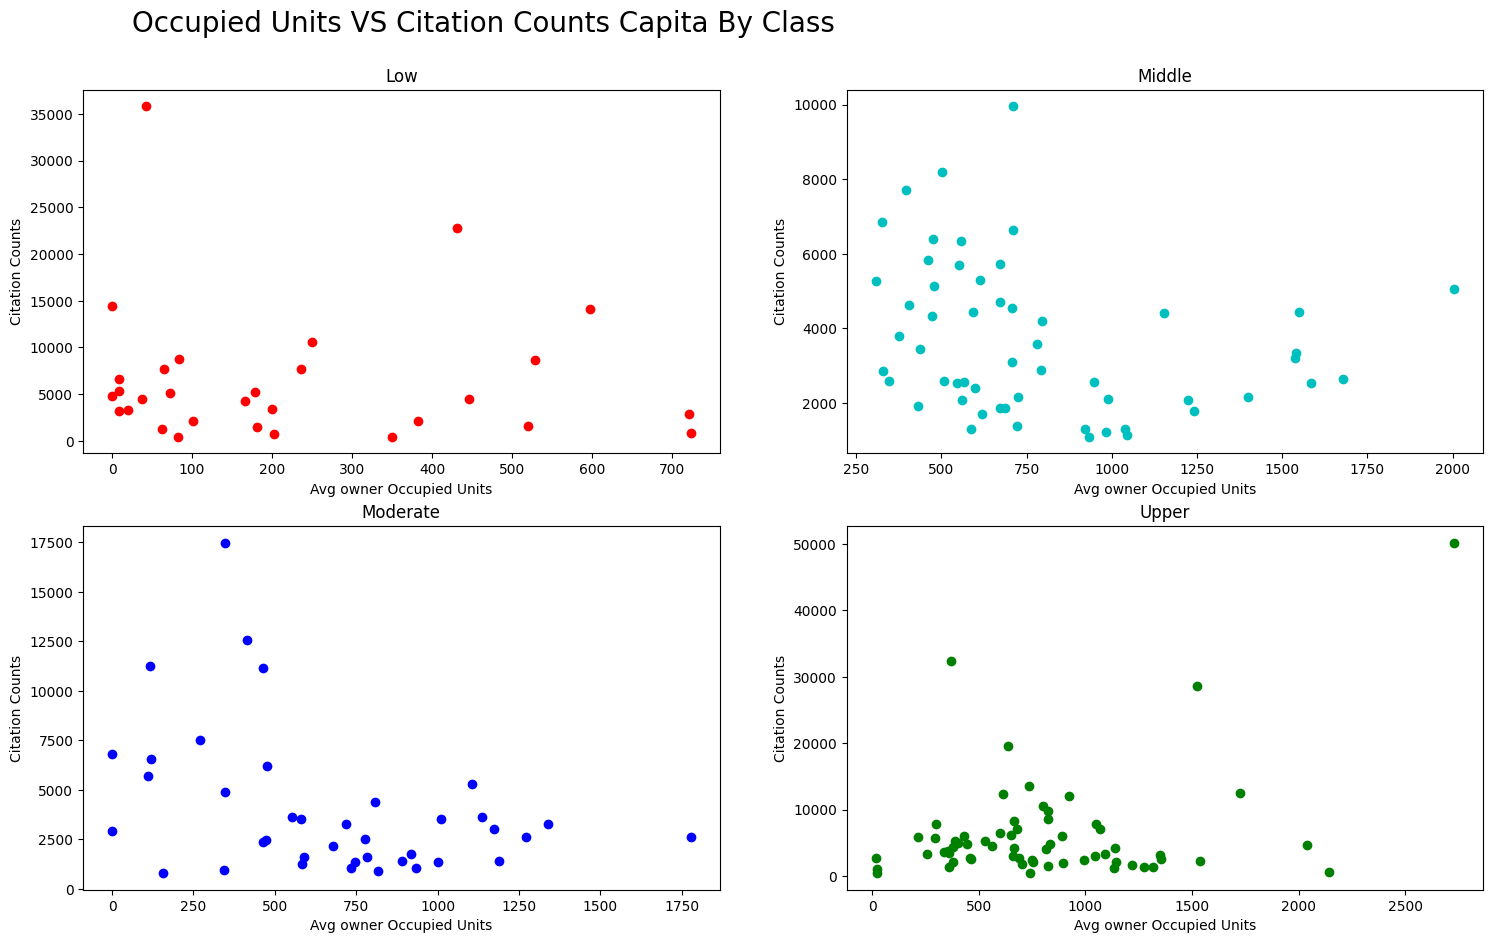

In [ ]:
#Occupied Units VS Citation Counts Capita BY income level. Using each Tract as a datapoint.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, ax in zip(range(len(levels)), axs.ravel()):
  l=t_avg[t_avg['Class']==levels[i]]
  ax.scatter(l['AVG Owner Units Occupied'],l['Citation Counts'],c=colors[i])
  ax.set_xlabel('Avg owner Occupied Units')
  ax.set_ylabel('Citation Counts')
  ax.set_title(levels[i])
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=.9, 
                    wspace=0.2, 
                    hspace=0.2)
fig.suptitle("Occupied Units VS Citation Counts Capita By Class",fontsize=20)
plt.show()

#high citation frequency for middle class neighbourhoods with lower units occupied

Associations to CITATION COUNTS BY CLASS:

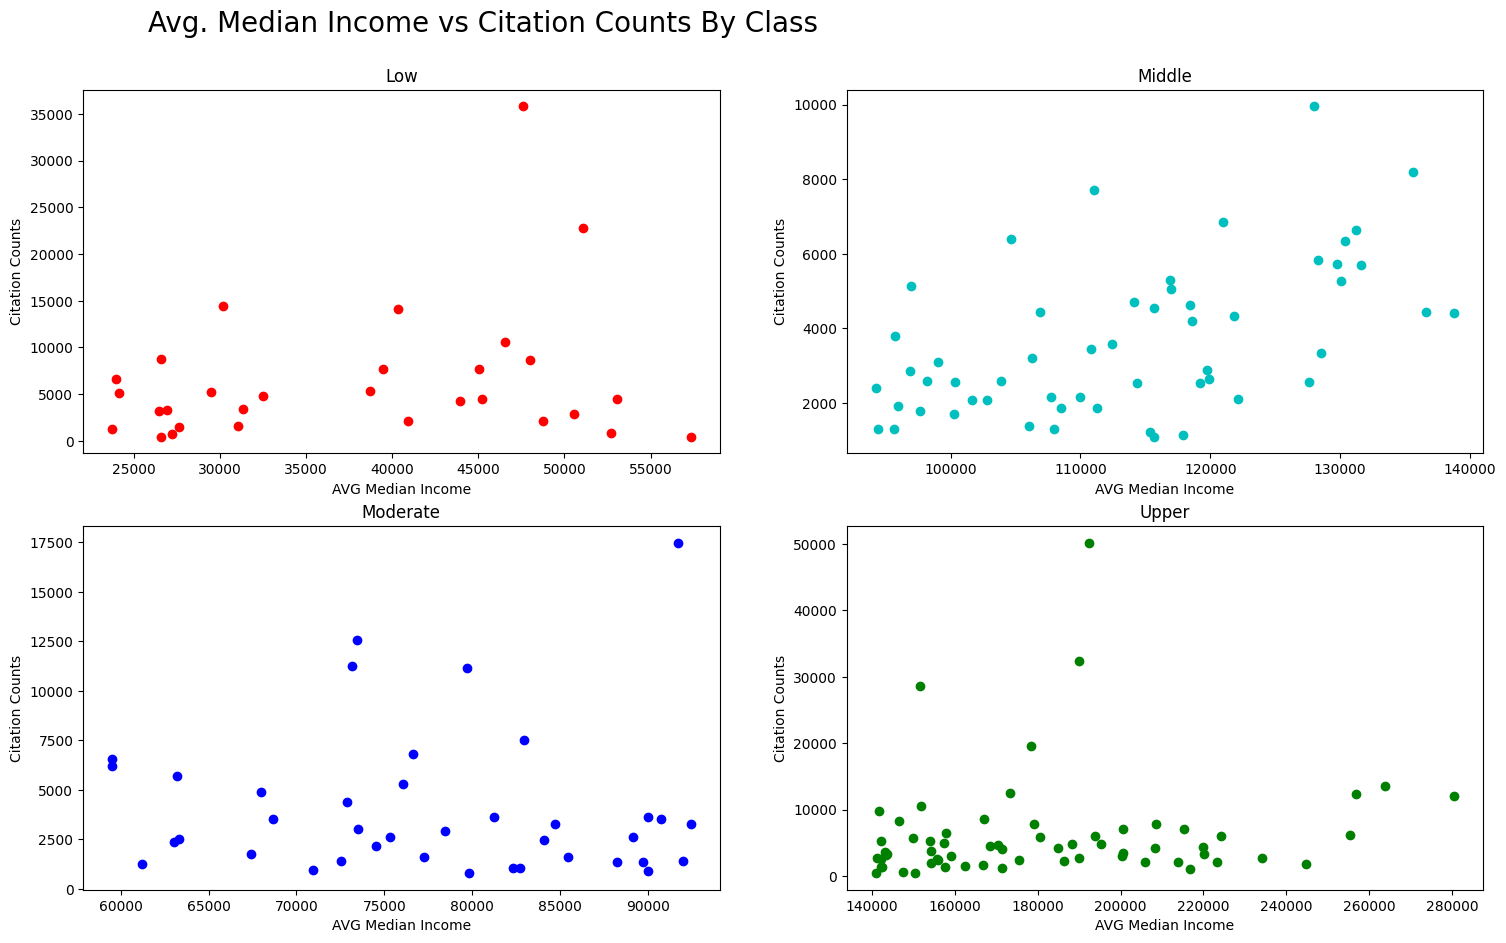

In [ ]:
#Median Income VS Citation Counts BY income level. Using each Tract as a datapoint.

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, ax in zip(range(len(levels)), axs.ravel()):
  l=t_avg[t_avg['Class']==levels[i]]
  ax.scatter(l['AVG Median Income'],l['Citation Counts'],c=colors[i])
  ax.set_xlabel('AVG Median Income')
  ax.set_ylabel('Citation Counts')
  ax.set_title(levels[i])
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=.9, 
                    wspace=0.2, 
                    hspace=0.2)
fig.suptitle("Avg. Median Income vs Citation Counts By Class",fontsize=20)
plt.show()

#Over here, we see a much better linear positive association between median income and counts in ONLY MIDDLE CLASS.

Any Other Relationships:

,Tract Code,Class,AVG Median Income,AVG Population,AVG Tract Minority %,AVG Owner Units Occupied,AVG Fine Amount,Avg Family Units,Citation Counts,Revenue per Capita
0,101.00,Moderate,91700.0,3798.0,52.95,346.0,88.339376,357.0,17488,406.761190
1,102.00,Upper,167022.0,4172.0,16.61,826.0,87.231281,823.0,8574,179.271572
2,103.00,Middle,103887.0,4387.0,47.14,507.0,88.409938,1272.0,2576,51.913380
3,104.00,Middle,118577.0,5148.0,41.82,795.0,87.584086,1430.0,4210,71.625680
4,105.00,Upper,190035.0,2589.0,49.52,371.0,98.729609,130.0,32379,1234.749324
...,...,...,...,...,...,...,...,...,...,...
183,614.00,Middle,138784.0,6140.0,52.30,1154.0,81.668402,1923.0,4418,58.764007
184,615.00,Upper,192316.0,12511.0,50.50,2729.0,98.232947,251.0,50183,394.023180
185,9802.00,Upper,150412.0,330.0,37.27,25.0,76.422932,75.0,532,123.203030
186,9805.01,Low,26539.0,880.0,92.95,83.0,86.445977,109.0,435,42.731818


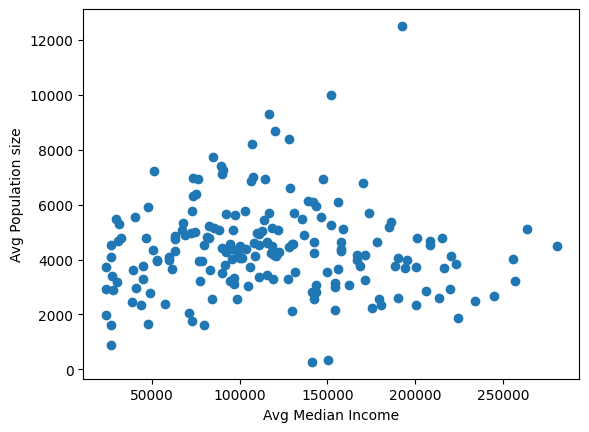

In [ ]:
display(t_avg)

#Median Income vs population size
plt.scatter(t_avg['AVG Median Income'],t_avg['AVG Population'])
plt.xlabel('Avg Median Income')
plt.ylabel('Avg Population size');

#No particular relationship, meaning we don't see people with higher median incomes live
#in neighborhoods with less population. 

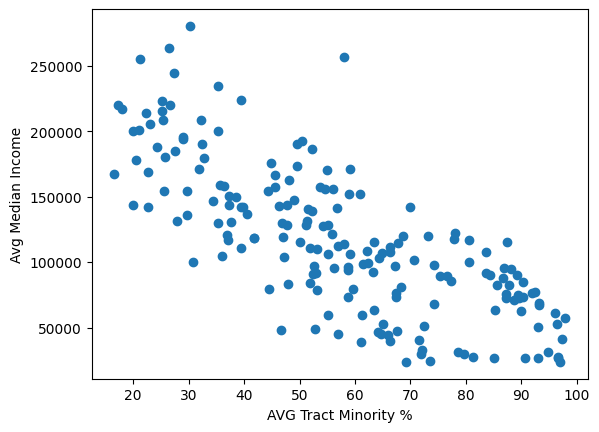

In [ ]:
#Median Income vs Minority %
plt.scatter(t_avg['AVG Tract Minority %'],t_avg['AVG Median Income'])
plt.xlabel('AVG Tract Minority %')
plt.ylabel('Avg Median Income');


#Rich people may not be living in neighborhoods with less people, 
#BUT they are living in neighborhoods with less minority OR are likely not minority themselves.

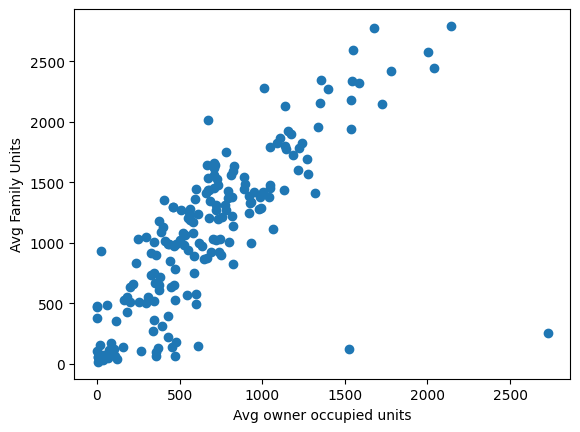

In [ ]:
#Owner units vs Family units
plt.scatter(t_avg['AVG Owner Units Occupied'],t_avg['Avg Family Units'])
plt.xlabel('Avg owner occupied units')
plt.ylabel('Avg Family Units');

#If the Neigbourhood has less Owner occupied Units, It also has low 1-4 family units occupied. 
#Meaning 1-4 family units may very likely be the same thing as owner occupied units (not sure what the diff is)

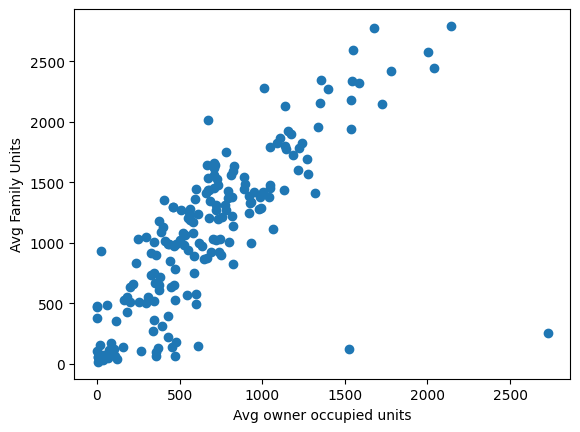

In [ ]:
#Owner units vs Minority %
plt.scatter(t_avg['AVG Owner Units Occupied'],t_avg['Avg Family Units'])
plt.xlabel('Avg owner occupied units')
plt.ylabel('Avg Family Units');

LOOKING AT DATA AVERAGED BY INCOME CLASS


,Tract Code,AVG Median Income,AVG Population,AVG Tract Minority %,AVG Owner Units Occupied,AVG Fine Amount,Avg Family Units,AVG Counts,Avg Revenue per Capita
Class,,,,,,,,,
Low,517.776667,37893.600000,3683.966667,77.326000,223.600000,89.750798,463.566667,6484.166667,196.418585
Moderate,270.883590,77571.025641,4786.717949,75.717436,672.205128,88.890633,1080.743590,4049.307692,88.376611
Middle,300.189455,113480.527273,4847.800000,57.285273,784.781818,85.609000,1392.327273,3652.163636,69.162900
Upper,523.035938,181367.328125,4061.593750,36.992031,803.109375,85.836810,1113.484375,6327.843750,149.484747


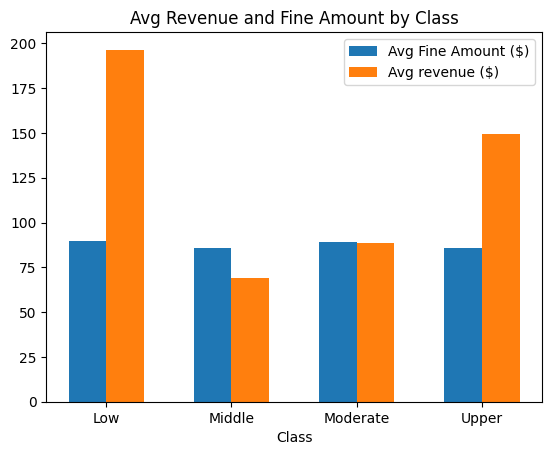

In [ ]:
#Summary Statistics of Citation data On each CLASS:

#Finding Averages of data by INCOME LEVEL using Tract Average Data
c_avg=t_avg.groupby('Class').mean().rename(columns={'Citation Counts':'AVG Counts','Revenue per Capita':'Avg Revenue per Capita'})
display(c_avg.sort_values(by=['AVG Median Income']))

#Create side-by-side Barplots on these Averages to see differences across income class.
x=list(c_avg.index)
ya=list(c_avg['AVG Tract Minority %'])
yb=list(c_avg['AVG Fine Amount'])
yc=list(c_avg['AVG Population'])
yd=list(c_avg['AVG Owner Units Occupied'])
ye=list(c_avg['AVG Counts'])
yf=list(c_avg['Avg Revenue per Capita'])

plt.bar(x,yb,width=-0.3,align='edge',label='Avg Fine Amount ($)')
plt.bar(x,yf,width=0.3,align='edge',label='Avg revenue ($)')
plt.title('Avg Revenue and Fine Amount by Class')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Class')
plt.show();
#In this bar graph we see how Stark the difference in revenue is between lower and middle class, 
#Which goes to show how inproportionally more citations are being handed to Lower class despite 
#Avg Fine Amounts staying somewhat similar.(But Avg fine amount are higher in Lower class too!)


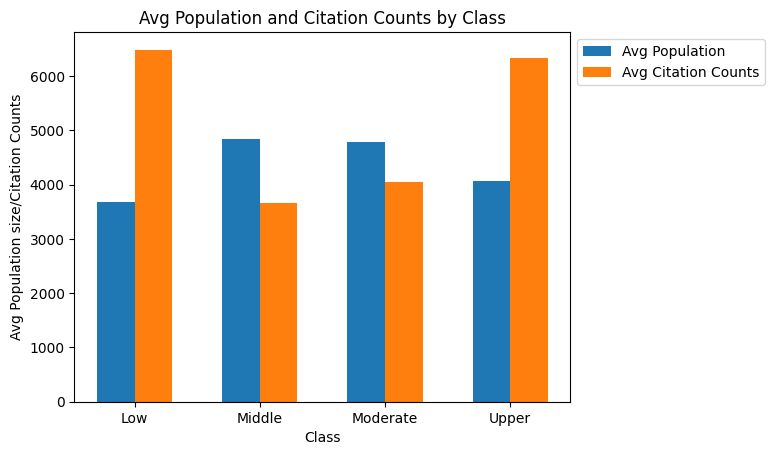

In [ ]:
plt.bar(x,yc,width=-0.3,align='edge',label='Avg Population')
plt.bar(x,ye,width=0.3,align='edge',label='Avg Citation Counts')
plt.legend(bbox_to_anchor=(1,1));
plt.xlabel('Class')
plt.ylabel('Avg Population size/Citation Counts')
plt.title('Avg Population and Citation Counts by Class')
plt.show()

#Lower Class CLEARLY has the largest difference between citation counts and populatin size. 
#Further supports the fact that Lower income class is getting DISPROPORTIONALLY more citations than it's population. 

EXPLORING VIOLATION TYPE

<ipython-input-35-be0e0f1b711a>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  low_cost=low.groupby('Violation Description').mean().reset_index()


,Violation Description,Counts,Fine Amount_y
0,PRK GRADE,4714,67.592703
1,REG TABS,5539,125.010291
2,TRK ZONE,7455,100.197183
3,DBL PARK,7466,110.120011
4,YEL ZONE,10047,99.970738
5,RES/OT,10188,85.410483
6,MTR OUT DT,18354,74.429770
7,PRK PROHIB,18381,109.478701
8,METER DTN,18673,85.332994
9,STR CLEAN,62234,74.496095


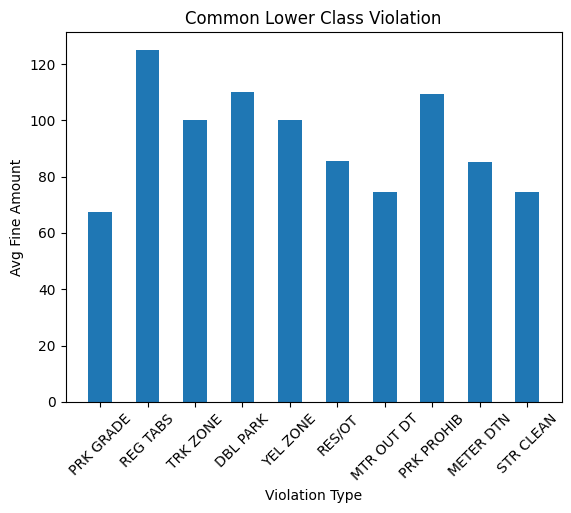

In [ ]:
#Exploring Violation Type

#Looking at Most common Violations for Lower CLass
inc_class=income_merge[['Tract Income Level','Violation Description','Fine Amount']]
low=inc_class[inc_class['Tract Income Level']=='Low']

low_count=low.groupby('Violation Description').count().sort_values(by='Fine Amount')[-10:].reset_index()
low_cost=low.groupby('Violation Description').mean().reset_index()

low=pd.merge(low_count,low_cost,on='Violation Description').rename(columns={'Tract Income Level':'Counts'})
del low['Fine Amount_x']
display(low)

x=list(low['Violation Description'])
y=list(low['Fine Amount_y'])

plt.bar(x,y,width=0.5,align='center')
plt.xticks(rotation=45)
plt.title('Common Lower Class Violation')
plt.xlabel('Violation Type')
plt.ylabel('Avg Fine Amount');


<ipython-input-36-f0b8d586e315>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  up_cost=up.groupby('Violation Description').mean().reset_index()


,Violation Description,Counts,Fine Amount_y
0,PK STANDS,7165,110.000000
1,PRK PROHIB,8727,109.449639
2,DBL PARK,10929,110.056913
3,NO PLATES,11480,121.008885
4,PRK GRADE,12624,67.470770
5,REG TABS,14816,121.637959
6,METER DTN,28173,85.374082
7,RES/OT,45274,85.547378
8,MTR OUT DT,58980,74.423856
9,STR CLEAN,139172,74.470899


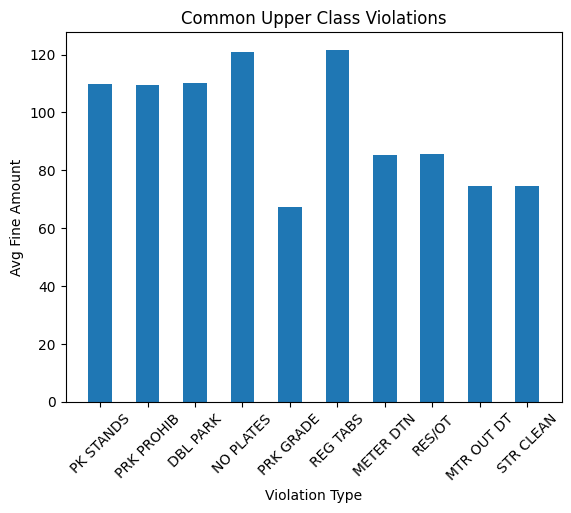

In [ ]:
#Looking at Most common Violations for Upper CLass
up=inc_class[inc_class['Tract Income Level']=='Upper']

up_count=up.groupby('Violation Description').count().sort_values(by='Fine Amount')[-10:].reset_index()
up_cost=up.groupby('Violation Description').mean().reset_index()

up=pd.merge(up_count,up_cost,on='Violation Description').rename(columns={'Tract Income Level':'Counts'})
del up['Fine Amount_x']
display(up)


x=list(up['Violation Description'])
y=list(up['Fine Amount_y'])

plt.bar(x,y,width=0.5,align='center')
plt.xticks(rotation=45)
plt.title('Common Upper Class Violations')
plt.xlabel('Violation Type')
plt.ylabel('Avg Fine Amount');

<ipython-input-37-8660d1b0869b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  l=inc_class[inc_class['Tract Income Level']=='Low'].groupby('Violation Description').mean().reset_index().rename(columns={'Fine Amount':'Lower Fine Amount'})
<ipython-input-37-8660d1b0869b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  u=inc_class[inc_class['Tract Income Level']=='Upper'].groupby('Violation Description').mean().reset_index().rename(columns={'Fine Amount':'Upper Fine Amount'})


,Violation Description,Lower Fine Amount,Upper Fine Amount,diff
72,SIGNS,67.920000,66.895522,1.024478
9,BL ZNE BLK,872.000000,870.500000,1.500000
50,"OVR 18 "" C",69.928406,67.666409,2.261998
21,FCL BLK SP,69.000000,66.000000,3.000000
47,OT MTR PK,78.553741,75.300885,3.252857
66,REG TABS,125.010291,121.637959,3.372332
7,BIC PATHS,140.000000,135.488372,4.511628
2,3 FT WLCHR,303.945946,298.000000,5.945946
37,NOPL/PRDSP,150.827206,137.294118,13.533088
70,RR TRACKS,199.375000,105.600000,93.775000


3.7168981518936985
-1.801752936071773
0.4634146341463415
0.18292682926829268


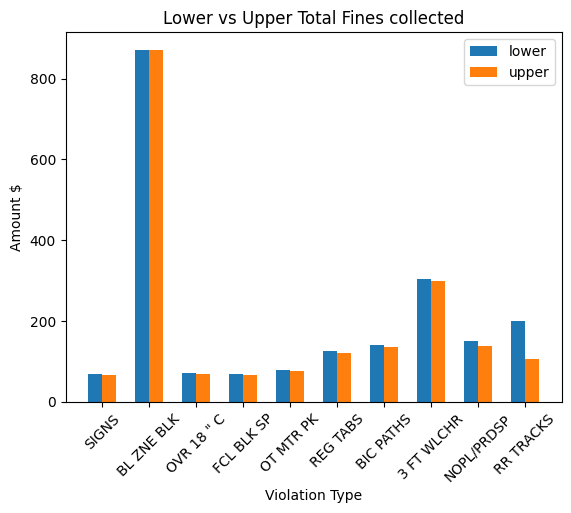

In [ ]:
l=inc_class[inc_class['Tract Income Level']=='Low'].groupby('Violation Description').mean().reset_index().rename(columns={'Fine Amount':'Lower Fine Amount'})
u=inc_class[inc_class['Tract Income Level']=='Upper'].groupby('Violation Description').mean().reset_index().rename(columns={'Fine Amount':'Upper Fine Amount'})
diff=pd.merge(l,u,on='Violation Description')
diff['diff']=diff['Lower Fine Amount']-diff['Upper Fine Amount']
d=diff[diff['diff']>0].sort_values(by='diff')[-10:]
display(d)

#Average difference and Percentage of Violations where Lower Income is avg fine is higher: 
lower_more= diff[diff['diff']>0]
upper_more= diff[diff['diff']<0]
print(lower_more['diff'].mean()) #Lower class citations on average is worth $3.72 more than Upper class citations
print(upper_more['diff'].mean()) #Upper class citations on average is worth $1.80 more than Lower class citations

print(len(lower_more)/len(diff)) #Lower class pays more than upper class for 46.3% of Violations 
print(len(upper_more)/len(diff)) #Upper class pays more than lower class for ONLY 18.3% of Violations


x=list(d['Violation Description'])
yl=list(d['Lower Fine Amount'])
yu=list(d['Upper Fine Amount'])

plt.bar(x,yl,width=-0.3,align='edge',label='lower')
plt.bar(x,yu,width=0.3,align='edge',label='upper')
plt.xticks(rotation=45)
plt.title('Lower vs Upper Total Fines collected')
plt.xlabel('Violation Type')
plt.ylabel('Amount $')
plt.legend()
ax.set_ylim(ymax=300);
                             